<a href="https://colab.research.google.com/github/shahzarhusain/play-store-data-analysis/blob/main/EDA_Capstone_project_on_PlayStore_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing the dataset to work on 
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter_datasets/Copy of Play Store Data.csv')

# Basic evaluation of the dataset

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


We can see that we have majorty of features in object form and only one in numerical, which doesn't seem right. Let's explore further into these features.

In [ ]:
#Firstly let's check for the missing data
def missing(df):
  missing_data = 100* df.isnull().sum()/len(df)
  return missing_data

In [ ]:
missing_data = missing(df)

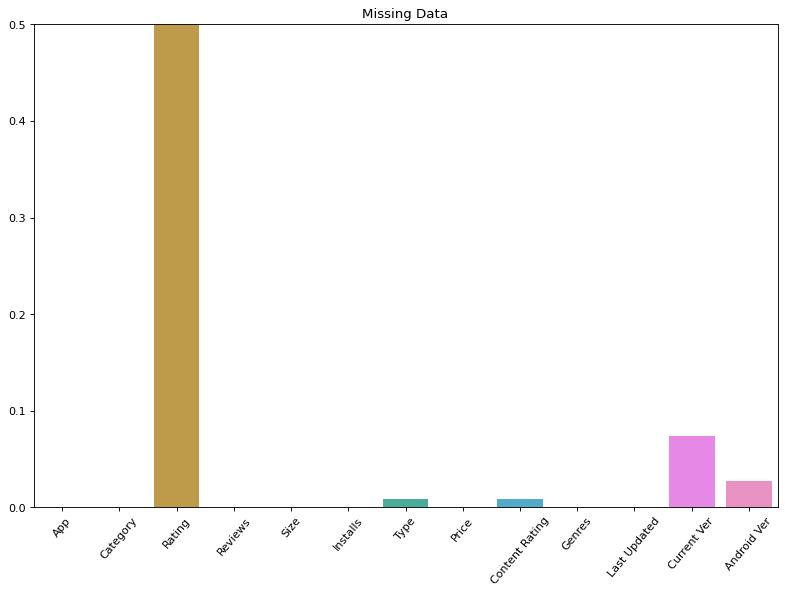

In [ ]:
plt.figure(figsize=(12,8), dpi = 80)
sns.barplot(x = missing_data.index, y = missing_data)
plt.xticks(rotation = 50)
plt.ylim(0,0.5)
plt.title('Missing Data')
plt.show()

In [ ]:
less_than_1_percent = ['Type', 'Content Rating', 'Current Ver', 'Android Ver']
df = df.dropna(subset = less_than_1_percent)

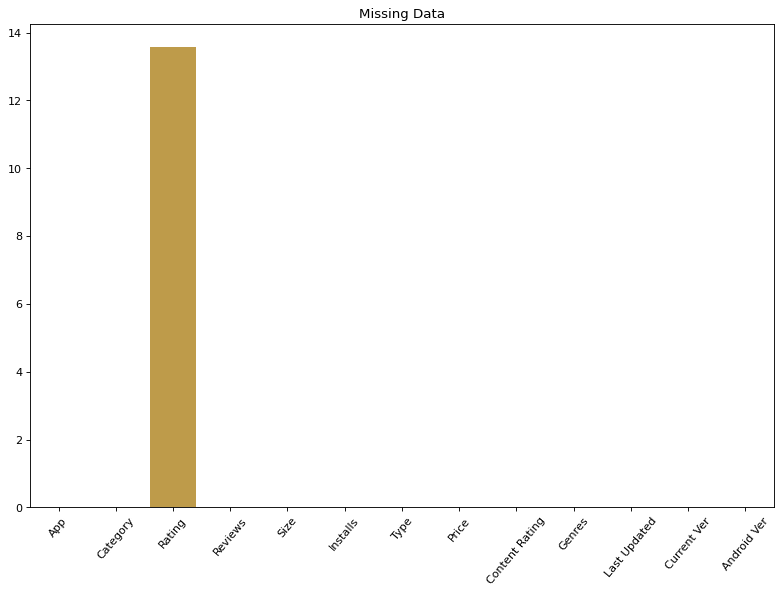

In [ ]:
missing_data = missing(df)
plt.figure(figsize=(12,8), dpi = 80)
sns.barplot(x = missing_data.index, y = missing_data)
plt.xticks(rotation = 50)
plt.title('Missing Data')
plt.show()

In [ ]:
# now we only have ratings column to deal with having approx 13% of data missing
df['Rating'].median()

4.3

In [ ]:
df.groupby('Category')['Rating'].median()

Category
ART_AND_DESIGN         4.4
AUTO_AND_VEHICLES      4.3
BEAUTY                 4.3
BOOKS_AND_REFERENCE    4.5
BUSINESS               4.3
COMICS                 4.4
COMMUNICATION          4.3
DATING                 4.1
EDUCATION              4.4
ENTERTAINMENT          4.2
EVENTS                 4.5
FAMILY                 4.3
FINANCE                4.3
FOOD_AND_DRINK         4.3
GAME                   4.4
HEALTH_AND_FITNESS     4.5
HOUSE_AND_HOME         4.3
LIBRARIES_AND_DEMO     4.2
LIFESTYLE              4.2
MAPS_AND_NAVIGATION    4.2
MEDICAL                4.3
NEWS_AND_MAGAZINES     4.2
PARENTING              4.4
PERSONALIZATION        4.4
PHOTOGRAPHY            4.3
PRODUCTIVITY           4.3
SHOPPING               4.3
SOCIAL                 4.3
SPORTS                 4.3
TOOLS                  4.2
TRAVEL_AND_LOCAL       4.3
VIDEO_PLAYERS          4.2
WEATHER                4.3
Name: Rating, dtype: float64

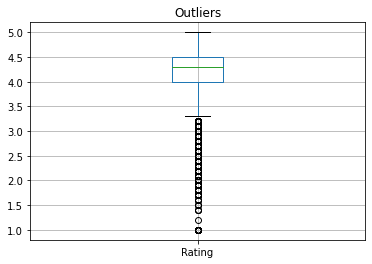

In [ ]:
# checking for an outlier in our data
plt.title('Outliers')
df.boxplot()
plt.show()

In [ ]:
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda value: value.fillna(value.median()))

In [ ]:
missing_data = missing(df)
missing_data

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

Now, let's move towards the columns which should be in Integer but saved in object form like Reviews, Size, Installs, Price.

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Reviews'] = df['Reviews'].astype('int')

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df['Price'].apply(lambda x : x.replace('$',''))

In [ ]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df['Price'] = df['Price'].astype('float')

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [ ]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+',''))

In [ ]:
df['Installs'] = df['Installs'].astype('int')

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df[df['Size'] =='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000,Free,0.0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,100000,Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


#Looking at the dataset categorywise.

In [ ]:
#creating an object for the dataset
grp = df.groupby('Category')

In [ ]:
categories = sorted(df['Category'].unique())
categories

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER']

In [ ]:
app = grp['App'].count()
reviews = grp['Reviews'].sum()
installs = grp['Installs'].sum()
price = grp['Price'].sum()
ratings = grp['Rating'].mean()

Text(0, 0.5, 'Numbe of apps')

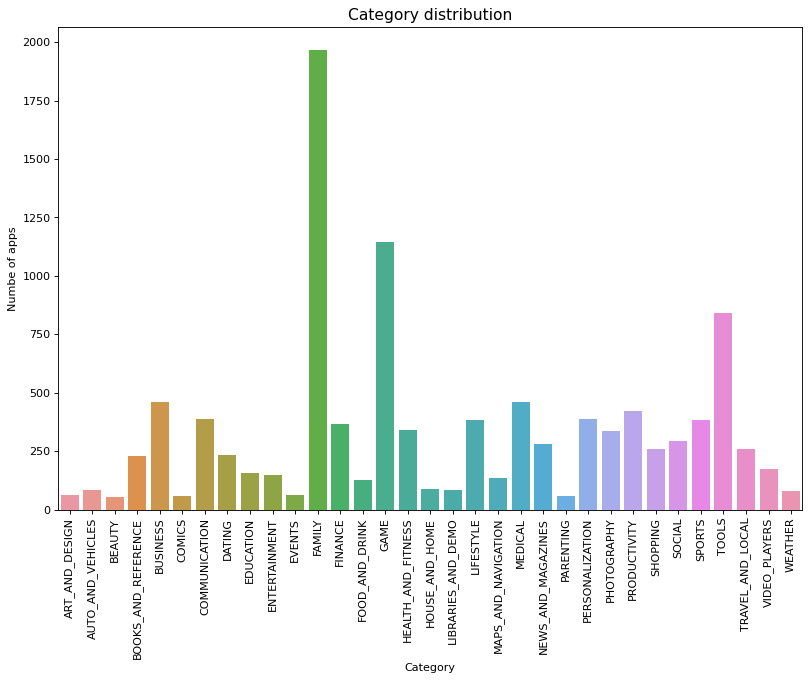

In [ ]:
# To check the apps distribution based on category
plt.figure(figsize = (12,8), dpi = 80)
sns.barplot(x = categories, y = app);
plt.xticks(rotation = 90);
plt.title('Category distribution', size = 14)
plt.xlabel('Category')
plt.ylabel('Numbe of apps')
# Looks like Finance based apps are quite in demand

In [ ]:
# Let's find out about the FAMILY category in details
df_family = df[df['Category']=='FAMILY']

In [ ]:
df_family.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2014,YouTube Kids,FAMILY,4.5,470694,Varies with device,50000000,Free,0.0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
2015,Candy Bomb,FAMILY,4.4,42145,20M,10000000,Free,0.0,Everyone,Casual;Brain Games,"July 4, 2018",2.9.3181,4.0.3 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,1000000,Free,0.0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,5000000,Free,0.0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up


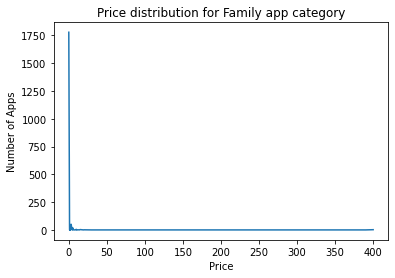

In [ ]:
df_family.groupby('Price')['Price'].count().plot()
plt.ylabel('Number of Apps')
plt.title('Price distribution for Family app category')
plt.show()

In [ ]:
 df_family[df_family['Price'] == df_family['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
price

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2433.79
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         152.47
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   266.26
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

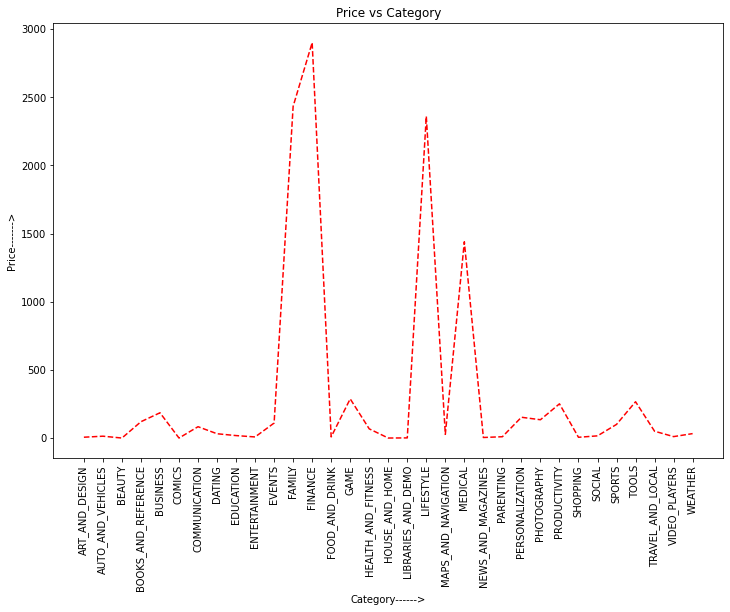

In [ ]:
plt.plot(price, 'r--', color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Category------>', size = 10)
plt.ylabel('Price------->')
plt.title('Price vs Category');

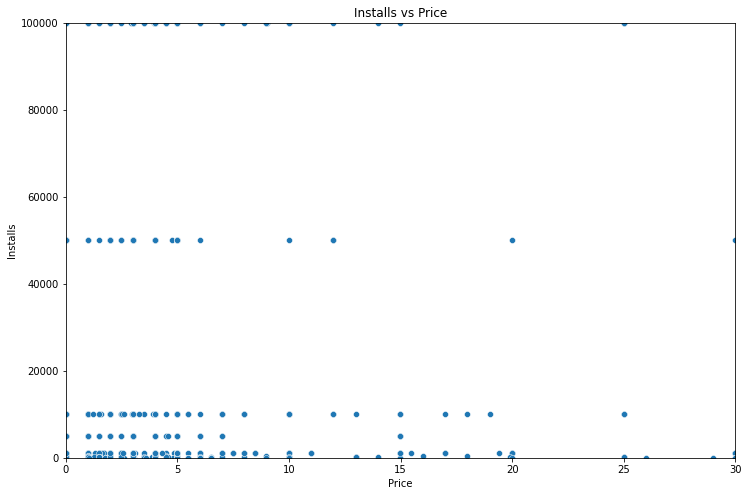

In [ ]:
# to check if price of the app is affecting the number of installs
plt.plot(dpi = 80)
sns.scatterplot(x = 'Price', y = 'Installs', data = df );
plt.xlim(0,30)
plt.ylim(0,100000)
plt.title('Installs vs Price');

# it seems that price does not has any direct impact on the installs

We checked that what category has highest numbers of apps but now let's check how much installs does each category has!

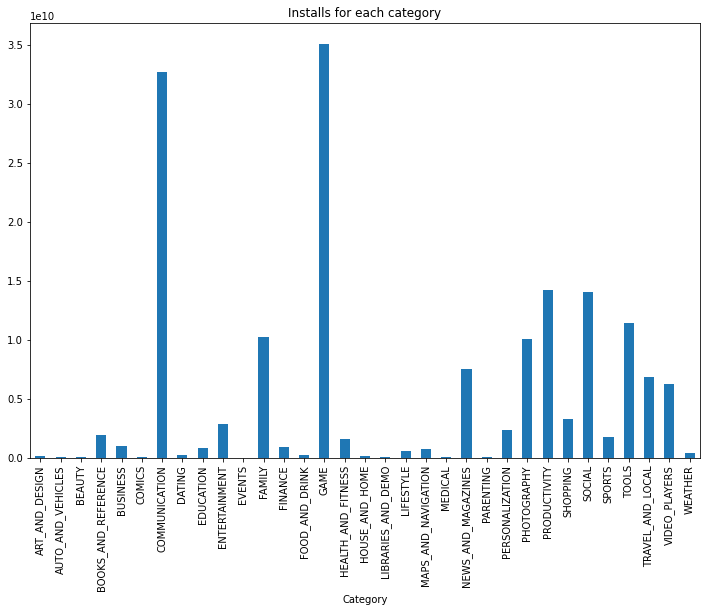

In [ ]:
installs.plot(kind = 'bar')
app.plot(kind= 'bar')
plt.title('Installs for each category')
plt.show()

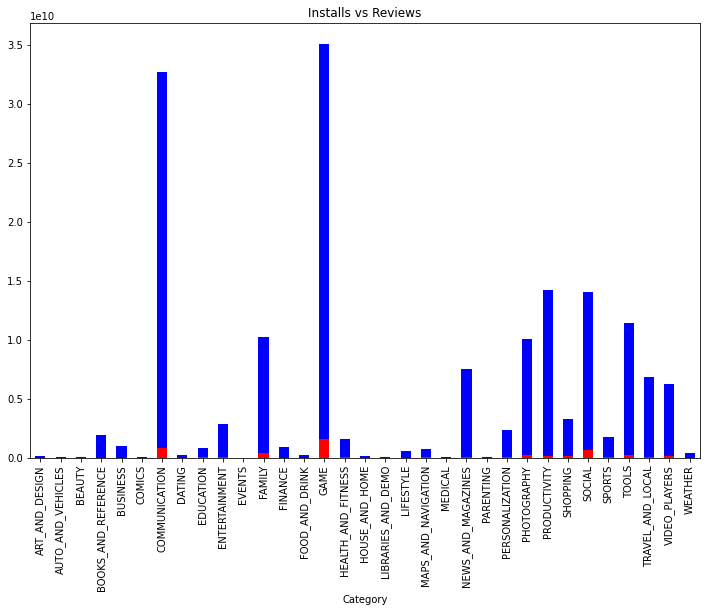

In [ ]:
installs.plot(color = 'blue', label = 'Installs', kind = 'bar')
reviews.plot(color = 'red', label = 'Reviews', kind = 'bar')
plt.title('Installs vs Reviews')
plt.show()

In [ ]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.062982,0.045332,-0.019297
Reviews,0.062982,1.000000,0.643112,-0.009674
Installs,0.045332,0.643112,1.000000,-0.011698
Price,-0.019297,-0.009674,-0.011698,1.000000


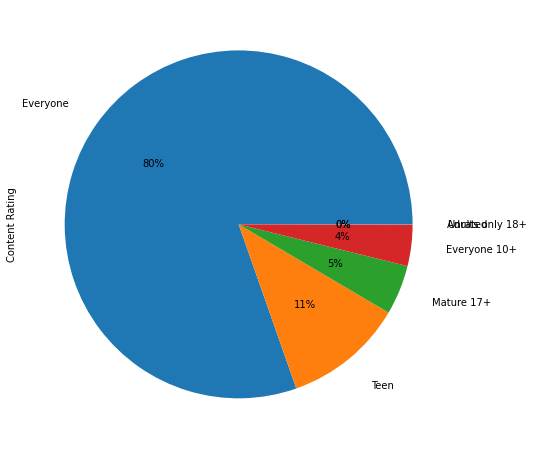

In [ ]:
(df['Content Rating'].value_counts(normalize = True)*100).plot(kind = 'pie', labeldistance=1.2, autopct = '%1.0f%%' )
#plt.pie(labeldistance=1.2)
plt.show()

In [ ]:
#as we can see that unrated category is almost 0, we will ignore that for now 
pie_data = df['Content Rating'].value_counts(normalize= True)*100

In [ ]:
pie_data = pie_data[pie_data>1]

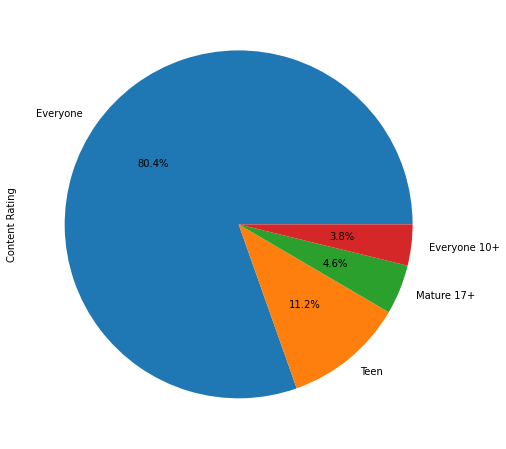

In [ ]:
pie_data.plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()